## Assignments

To close out this checkpoint, you'll do two assignments. Both require you to create Jupyter notebooks. Please submit links to your notebooks below

### 1. Predicting temperature (see details below)

In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. The dataset you'll use is a Postgres database version of [this dataset from Kaggle](https://www.kaggle.com/budincsevity/szeged-weather/home). To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.
* Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing*, and *pressure*. Estimate the model using OLS.
* Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

Here are the credentials you can use to connect to the database:

```
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'
```

As in earlier assignments, be sure to close the database connection after initially pulling in your data.


### 2. [House prices (see solution here)](Module%2019%20-%20Simple%20linear%20regression%20with%20OLS%20(short%20version).ipynb)

To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database. 
* Reimplement the model you built in the previous checkpoint. 
* Check for all of the assumptions above and discuss the implications if some of the assumptions are not met.
*  be sure to close the database connection after initially pulling in your data.

### 1. Predicting temperature

**First, load the dataset from the weatherinszeged table from Thinkful's database.**

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

temperature_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

temperature_df.head(5)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.


**Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.**

In [6]:
# Y is the target variable
Y = temperature_df['temperature']

# X is the feature set which includes

X = temperature_df[['humidity','windspeed','windbearing','pressure']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.

lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.92643818528538


**Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.**

#### <Font color=blue>Assumption 1: Linearity of the model in its coefficients</font> 

The target variable should be a linear function of the model's coefficients

In [10]:
# ????????

#### <Font color=blue>Assumption 2: The error term should be zero on average</font> 


In [11]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the medical costs model is: {}".format(np.mean(errors)))

Mean of the errors in the medical costs model is: -3.5924203270721665e-15


The average of the model's error is zero.

#### <Font color=blue>Assumption 3: Homoscedasticity</font> 

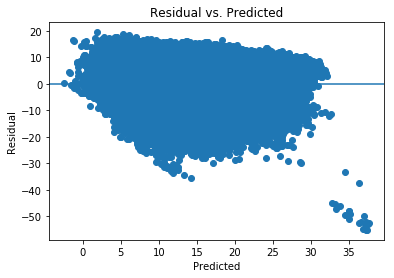

In [12]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [13]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


The null hypothesis said our model is homoscedastic.

Since p-values of both tests are 0, lower than 0.05, the test results reject the null hypothesis which means our errors are heteroscedastic.

#### <Font color=blue>Assumption 4: Low multicollinearity</font> 

Individual features should be only weakly correlated with one another, and ideally completely uncorrelated

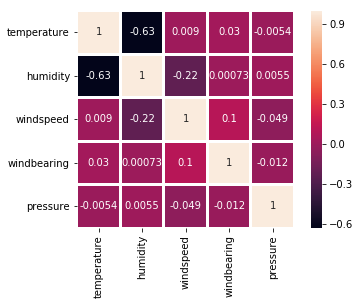

In [16]:
import seaborn as sns

correlation=temperature_df[['temperature','humidity','windspeed','windbearing','pressure']].corr()
sns.heatmap(correlation, square=True, annot=True, linewidths=2)

THe model presents low multicollinearity because features are low correlated among them.

#### <Font color=blue>Assumption 5: Error terms should be uncorrelated with one another</font> 

Error terms should be uncorrelated with one another. In other words, the error term for one observation shouldn't predict the error term for another.

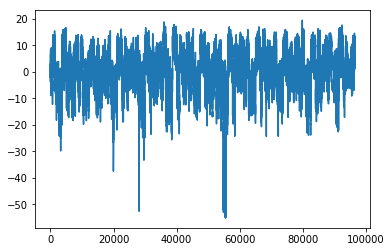

In [17]:
plt.plot(errors)
plt.show()

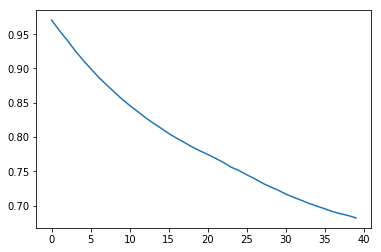

In [19]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

The autocorrelation function between the errors of our model is very high (ranging between -0.68 and 0.95).

#### <Font color=blue>Assumption 6: Features shouldn't be correlated with the errors</font> 

Explanatory variables and errors should be independent. This assumption is known as the **exogeneity**.

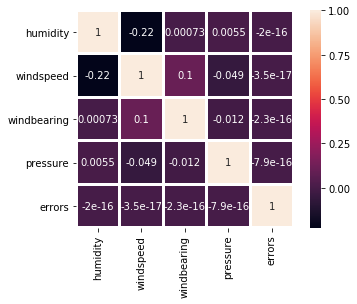

In [49]:
# Is itihs way a correct way?

data = temperature_df[['humidity','windspeed','windbearing','pressure']]

exogeneity_df = pd.DataFrame(data) 
exogeneity_df['errors'] = errors

correlation = exogeneity_df.corr()

sns.heatmap(correlation, square=True, annot=True, linewidths=2)

Very low correlation between errors and features

#### <Font color=blue>Something important to consider: Error terms must be normally distributed.</font> 



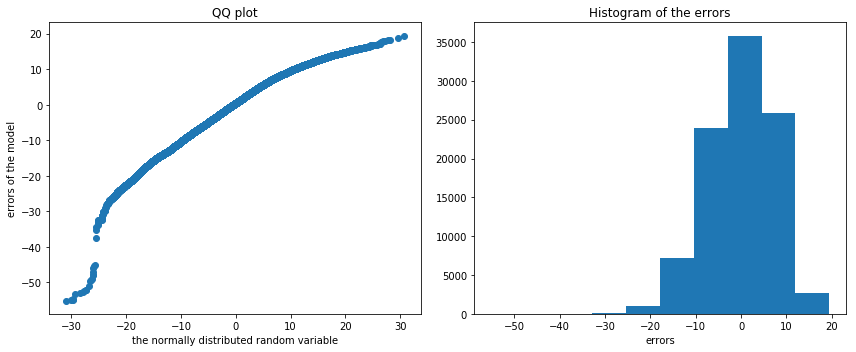

In [50]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [51]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252357 and p value is 0.0
Normality test statistics is 3375.4323076995743 and p value is 0.0


Null hypothesis says that our errors are normal distributed. Since p-values of both tests are less than 0.05, we reject the null hypothesis, it indicates that errors are not normally distributed.


### 2. [House prices (see solution here)](Module%2019%20-%20Simple%20linear%20regression%20with%20OLS%20(short%20version).ipynb)

-------------------------------------------------
<font color=gray>
By: Wendy Navarrete
11/8/2019